# FINAL PROJECT

# A. Thông Tin Nhóm: 

## I. Thông tin Thành Viên Nhóm :

Họ tên: Trần Hữu Hoàng

- MSSV: 18120387



Họ tên: Nguyễn Thành Ngôn

- MSSV: 1712617

## II. Phân Công:

### Trần Hữu Hoàng MSSV: 18120387

#### Khám phá dữ liệu nâng cao: 
1. Liệt kê top 5 đội bóng có số trận thắng nhiều nhất tính từ 1872-2021? Và top 5 đội bóng có thành tích giao hữu trên sân nhà tốt nhất?
2. Thành tích ghi bàn của đội tuyển Brazil thay đổi như thế nào qua 10 năm gần đây?

### Nguyễn Thành Ngôn - MSSV: 1712617

#### Khám phá dữ liệu nâng cao:
3. Top 5 đội bóng mạnh nhất giai đoạn 1872-2021?
4. Tỉ lệ thắng của các đội tham gia Euro 2020?

# B. Đồ Án

## I. Thu thập dữ liệu

### 1. Chủ đề & Nguồn dữ liệu

- Chủ đề: Thông tin các trận đấu bóng đá quốc tế
- Nguồn dữ liệu: Tập dữ liệu được lấy từ Kaggle: [International football results from 1872 to 2021](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017), trong phạm vi đồ án chỉ sử dụng file `results.csv`
- Sơ lược: Dữ liệu về kết quả các trận đấu bóng đá quốc tế từ năm 1872 cho đến 2021.Các trận đấu từ FIFA World Cup đến FIFI Wild Cup đến các trận giao hữu thông thường. Các trận đấu trong khuôn khổ bóng đá nam và dữ liệu không bao gồm Thế vận hội Olympic hoặc các trận đấu có ít nhất một trong các đội là đội hạng B, đội U-23 quốc gia hoặc đội tuyển của một giải đấu.


### 2. License

- CC0: Public Domain -> có thể sử dụng

### 3. Người ta thu thập dữ liệu như thế nào?

- Dữ liệu được thu thập từ một số nguồn  như là Wikipedia, rsssf.com và các trang web của các hiệp hội bóng đá cá nhân.

## II. Khám Phá Dữ Liệu & Tiền xử lí

### Import các thư viện cần thiết

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Đọc dữ liệu từ file `results.csv`

In [16]:
fb_df = pd.read_csv('results.csv') 
fb_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


### Dữ liệu có bao nhiêu dòng & bao nhiêu cột?

In [17]:
num_rows, num_cols =  fb_df.shape

In [18]:
assert num_rows == 42405
assert num_cols == 9

- Dữ liệu có 42405 dòng và 9 cột

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau hay không?

- Theo quan sát sơ bộ về dữ liệu thì mỗi dòng cho biết thông tin của một trận bóng đá và không có dòng nào có ý nghĩa khác biệt

### Dữ liệu có các dòng bị lặp hay không?

In [19]:
have_duplicated_rows = any(fb_df.duplicated())


In [20]:
assert have_duplicated_rows == False

- Không có dữ liệu bị lặp

### Mỗi cột có ý nghĩa gì?

`results.csv` gồm các cột: 
- **date** - ngày diễn ra trận đấu
- **home_team** - tên của đội chủ nhà
- **away_team** - tên của đội khách
- **home_score** - tỷ số toàn trận của đội chủ nhà bao gồm hiệp phụ, không bao gồm loạt sút luân lưu
- **away_score** - tỷ số toàn trận của đội khách bao gồm hiệp phụ, không bao gồm loạt sút luân lưu
- **tournament** - tên của giải đấu
- **city** - tên thành phố / thị trấn / đơn vị hành chính nơi trận đấu diễn ra
- **country** - tên quốc gia nơi trận đấu diễn ra
- **neutral** - Cột TRUE / FALSE cho biết trận đấu có được diễn ra tại một địa điểm trung lập hay không


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lí tiếp không?

In [21]:
fb_df.dtypes

date           object
home_team      object
away_team      object
home_score    float64
away_score    float64
tournament     object
city           object
country        object
neutral        object
dtype: object

**Vấn đề cần tiền xử lí**
- Cột "date" đang có dtype là `object`, để có thể khám phá tiếp cột này -> chuyển sang dạng `datetime`

## Tiền xử lí

#### Chuyển dtype của cột "date" sang `datetime`

In [38]:
fb_df['date'] = pd.to_datetime(fb_df['date'])

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

In [36]:
nume_col_profiles_df = pd.DataFrame({'missing_ratio': fb_df[['date', 'home_score', 'away_score']].isna().mean()*100,
                                    'min': fb_df[['date', 'home_score', 'away_score']].min(),
                                    'max': fb_df[['date', 'home_score', 'away_score']].max()}).T
nume_col_profiles_df['home_score']  = nume_col_profiles_df['home_score'].astype('int')
nume_col_profiles_df['away_score']  = nume_col_profiles_df['away_score'].astype('int')
nume_col_profiles_df

,date,home_score,away_score
missing_ratio,0.0,0,0
min,1872-11-30 00:00:00,0,0
max,2021-07-11 00:00:00,31,21


- Tỉ lệ thiếu gần như bằng 0
- Min, Max của các cột không có gì bất thường

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

In [37]:
cols = ["home_team", "away_team", "tournament", "city", "country", "neutral"]
missing_ratio = fb_df[cols].isna().mean()*100
num_diff_vals = fb_df[cols].nunique()
diff_vals = fb_df[cols].apply(lambda s: list(s.sort_values().unique()))

cate_col_profiles_df = pd.DataFrame({'missing_ratio': missing_ratio, 'num_diff_vals': num_diff_vals, 'diff_vals': diff_vals}).transpose()

cate_col_profiles_df

,home_team,away_team,tournament,city,country,neutral
missing_ratio,0.007075,0.007075,0.0,0.0,0.0,0.007075
num_diff_vals,308,305,113,2049,266,2
diff_vals,"[Abkhazia, Afghanistan, Albania, Alderney, Alg...","[Abkhazia, Afghanistan, Albania, Alderney, Alg...","[ABCS Tournament, AFC Asian Cup, AFC Asian Cup...","[6th of October City, Aachen, Aalborg, Aarau, ...","[Afghanistan, Albania, Algeria, Andorra, Angol...","[False, True, nan]"


## Xử lý dữ liệu nâng cao


### 1. Liệt kê top 5 đội bóng có số trận thắng nhiều nhất tính từ 1872-2021? Và top 5 đội bóng có thành tích giao hữu trên sân nhà tốt nhất?


### Tiền xử Lý

#### Để trả lời cho 2 câu hỏi trên chúng ta cần thêm cột dữ liệu  win_team:
- cột win_team chưa thông tin về tên đội tuyển giành thắng lợi. Nếu kết quả thi đấu là hòa nhau thì cột win_team chứa giá trị là NaN.

##### Thêm vào cột chứa tên đội tuyển giành chiến thắng:
- Đầu tiên chúng ta gán cho cột win_team tên của đội tuyển của cột home_team có home_score > away_score
- Sau đó dùng hàm fillna các giá trị NaN bằng tên của đội tuyển của cột away_team có away_score > home_score
- các giá trị NaN còn lại tương ứng kết quả trận đấu là Hòa.

In [24]:
fb_df = fb_df.assign(win_team = fb_df[(fb_df['home_score'] > fb_df['away_score'])]['home_team']) 
fb_df['win_team'] = fb_df['win_team'].fillna(fb_df[(fb_df['home_score'] < fb_df['away_score'])]['away_team'])
fb_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,win_team
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,NaN
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Scotland


### Trả lời câu Hỏi

##### top 5 đội bóng có số trận thắng nhiều nhất: 
Dưới đây sẽ liệt kê 5 theo thứ tự có số trận thắng nhiều thứ 1 đến nhiều thứ 2... gán vào biến top5_win_team

In [25]:
top5_win_team = fb_df['win_team'].value_counts()[:5].index.to_list()
top5_win_team

['Brazil', 'England', 'Germany', 'Argentina', 'Sweden']

##### top 5 đội bóng có thành tích giao hữu tốt nhất:
Dưới đây sẽ liệt kê 5 theo thứ tự có số trận thắng nhiều thứ 1 đến nhiều thứ 2... gán vào biến top5_team_friendly

In [26]:
top5_team_friendly = fb_df[(fb_df['tournament'] =='Friendly')]['win_team'].value_counts()[:5].index.to_list()
top5_team_friendly

['Germany', 'Brazil', 'Hungary', 'Sweden', 'England']

### 2. Thành tích ghi bàn của đội tuyển Brazil thay đổi như thế nào qua 10 năm gần đây?

### Tiền Xử Lý

##### Thêm cột year vào fb_df

In [27]:
fb_df = fb_df.assign(year = fb_df['date'].dt.year)
fb_df['year'].max()

2021

#### Tính số bàn thắng của đội tuyển brazil trong 10 năm gần đây:
- Đầu Tiên ta tính tổng số bàn thắng với tư cách là home_team và lưu vào biến Brazil_score_each_year.
- Sau đó cộng thêm bàn thắng với tư cách là away_team và lưu vào biến Brazil_score_each_year.
- lấy danh sách 10 năm gần đây và lưu vào biến Brazil_score_10_year

In [29]:
Brazil_score_each_year = fb_df[(fb_df['home_team'] == 'Brazil')]['home_score'].groupby(fb_df['year']).sum()
Brazil_score_each_year += fb_df[(fb_df['away_team'] == 'Brazil')]['away_score'].groupby(fb_df['year']).sum()
Brazil_score_10_year = Brazil_score_each_year.iloc[-10:92]
Brazil_score_10_year

year
2012    38.0
2013    49.0
2014    33.0
2015    20.0
2016    28.0
2017    21.0
2018    29.0
2019    33.0
2020    12.0
2021    15.0
Name: home_score, dtype: float64

#### Đồ thị cột thể hiện số bàn thắng ghi được của đội tuyển Brazil trong 10 năm gần đây:

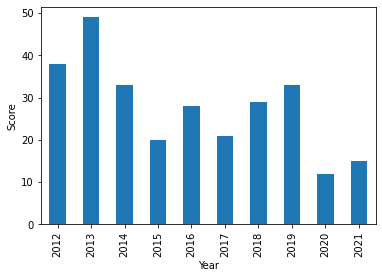

In [30]:
Brazil_score_10_year.plot(kind = "bar")
plt.ylabel('Score')
plt.xlabel('Year');

#### 3. Top 5 đội bóng mạnh nhất giai đoạn 1872-2021?

In [33]:
def TotalPoint(country):
        point = []
        home = 0
        ax = fb_df[(fb_df["home_team"]==country) | (fb_df["away_team"]==country)]
        team = ax.iloc[:,1:3].values
        score = ax.iloc[:,3:5].values
        for i in range(len(ax)):
            home = 0
            if team[i][0]==country:
                home = 1
            if score[i][0] == score[i][1]:
                point.append(1)
            if home == 1 and score[i][0] > score[i][1]:
                point.append(3)
            if home == 0 and score[i][0] < score[i][1]:
                point.append(3)
            if home == 1 and score[i][0] < score[i][1]:
                point.append(0)
            if home == 0 and score[i][0] > score[i][1]:
                point.append(0)      
        point = pd.Series(point)  
        return point.sum()

In [34]:
point_data = {"Country":[],
             "Total Point":[]}
for country in pd.concat([fb_df.home_team, fb_df.away_team], axis=0).unique():
    point_data["Country"].append(country)
    point_data["Total Point"].append(int(TotalPoint(country)))
point_df = pd.DataFrame(point_data)
point_df

<ipython-input-33-943f824a587d>:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  point = pd.Series(point)


,Country,Total Point
0,Scotland,1299
1,England,2002
2,Wales,793
3,Northern Ireland,651
4,United States,1051
...,...,...
308,NaN,0
309,Asturias,3
310,Western Australia,30
311,Two Sicilies,3


In [35]:
rank = len(point_df)
ax = point_df.sort_values("Total Point", ascending=False).set_index("Country").head(rank)
ax["Rank"] = np.arange(1,rank+1)
ax.head()

,Total Point,Rank
Country,,
Brazil,2113,1
England,2002,2
Germany,1889,3
Argentina,1847,4
Sweden,1756,5


## Lợi ích của việc trả lời câu hỏi:
- Sắp theo theo thứ tự bảng xếp hạng của FIFA
- Có thể tìm ra ứng cử viên cho chức vô địch của các mùa giải sắp xảy ra

#### 4. Tỉ lệ thắng của đội tham gia Euro 2020?

## Nhìn lại quá trình làm đồ án

### Khó khăn

**Ngôn**
- Setup môi trường hay lỗi
- Môn học không thuộc chuyên ngành chính nên gặp khó khăn từ những khái niệm đầu
- Giai đoạn làm đồ án trùng với giai đoạn nước rút của đồ án tốt nghiệp nên chưa sắp xếp được thời gian hợp lí để đầu tư vào môn học

**Hoàng**

### Những thứ học được

**Ngôn**
- Do từ chuyên ngành khác nên những gì học được đều mới và hữu ích


## Tài liệu tham khảo

- https://pandas.pydata.org/
- https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017
- 3 file bài tập của môn học